# 模型可解释性（Interpretability）概述

---

## ❓ 什么是模型可解释性？

**模型可解释性（Interpretability）** 是指我们对模型内部决策逻辑的理解程度 ——  
也就是说，我们是否能够回答这个问题：

> 「模型为什么做出这个预测？」

在简单模型（如线性回归、决策树）中，我们可以通过权重或规则路径直观理解模型行为；  
但在复杂模型（如随机森林、XGBoost、深度神经网络）中，模型内部像“黑箱”，可解释性就变得困难。

---

## 🎯 为什么模型必须可解释？

| 原因             | 说明                                                                 |
|------------------|----------------------------------------------------------------------|
| 📌 **模型可信度**   | 用户/业务方需要知道模型“凭什么”判断，增加接受度和信任感              |
| 🛠 **模型调试与迭代** | 发现模型错误行为（如依赖无关特征）时，便于修正或加入约束               |
| ⚖️ **法律合规要求** | 在金融、医疗等领域，必须“解释”模型决策以满足审计和合规性（如 GDPR）     |
| 📈 **结果诊断优化** | 解释模型决策背后的主导因素，有助于挖掘规律、引导业务策略优化             |

---

## ✅ 可解释性 ≠ 可视化

- 可视化关注的是「看起来如何」，比如 loss 曲线、feature map；
- 可解释性关注的是「**为什么这么做**」，强调 **因果性 + 推理能力**。

---

## 🧠 一个简单例子：

> 模型预测某人贷款违约风险高：  
> ✅ 可解释性告诉你：因为收入低、信用评分差、最近多次申请信用卡。  
> ❌ 不解释时：你只拿到 “0.93 的违约概率”，但无法知道原因。

---
- 可解释性的分类（全局 vs 局部）
- 三种主流解释方法（Feature Importance, SHAP, LIME）
- 如何在项目与面试中使用解释性方法增强说服力与可信度


# 🔍 可解释性的类型：全局 vs 局部

---

## 📌 可解释性不是一类技术，而是两个视角：

在实际应用中，我们通常将模型可解释性分为两类：

| 类型         | 关注范围             | 典型问题                             |
|--------------|----------------------|--------------------------------------|
| **全局解释** | 模型整体行为         | “这个模型整体最重要的特征是什么？”      |
| **局部解释** | 单个样本的预测决策   | “为什么这个用户被判定为高风险？”         |

---

## ✅ 全局可解释性（Global Interpretability）

关注的是模型整体的决策趋势，例如：

- 哪些特征在整个训练集中最重要？
- 模型是否存在偏置（如年龄越大就越容易拒绝）？
- 模型逻辑是否符合人类领域知识？

### 🧰 常见方法：
- 特征重要性（Feature Importance）
- 平均 SHAP 值
- 决策路径可视化（对于树模型）

---

## ✅ 局部可解释性（Local Interpretability）

关注的是某一个具体样本的预测原因，例如：

- 为什么这个客户会被判为“高风险”？
- 模型认为哪些特征在这个样本上起了关键作用？

### 🧰 常见方法：
- SHAP（逐样本值分解）
- LIME（基于邻域扰动）
- 模型对输入的敏感性分析（saliency）

---

## 🧠 举例对比

假设你用模型预测贷款违约：

- **全局问题**：在 10 万用户中，哪些特征整体最影响模型判断？
- **局部问题**：为什么张三被判为“高风险”而李四没有？

---

## 🧩 选择方法的建议

| 方法/视角     | 是否解释模型整体？ | 是否解释单个预测？ | 适用场景                                 |
|---------------|--------------------|----------------------|------------------------------------------|
| Feature Importance | ✅                | ❌                    | 树模型整体分析，业务汇报                  |
| SHAP               | ✅                | ✅                    | 准确、统一，可用于深度学习、XGBoost 等     |
| LIME               | ❌                | ✅                    | 快速分析某个预测点，适合调试或审查模型决策 |

---

📌 接下来我们将介绍第一个可解释性方法：**Feature Importance（特征重要性）**，它是理解树模型行为的首选方式。


# 🌟 方法一：Feature Importance（特征重要性）

---

## 📌 什么是特征重要性？

**特征重要性（Feature Importance）** 衡量的是：每个特征对模型整体预测结果的“平均影响力”。

它是一种 **全局解释方法**，可以回答：
> “这个模型最依赖哪些输入特征？”

---

## 🧠 背后的原理

对于树模型（如 `RandomForest`, `XGBoost`）：

- 每次分裂节点时会选择一个特征来“分割信息”
- 如果一个特征频繁被用来分裂，并且带来很大信息增益，则它的重要性就高

---

## 🔧 Sklearn 示例代码（适用于树模型）

```python
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)

# 获取特征重要性
importances = model.feature_importances_

# 可视化
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()
```

## ✅ 适用模型

| 模型类型               | 支持方式                          |
|------------------------|-----------------------------------|
| 决策树（DecisionTree） | `.feature_importances_` 属性      |
| 随机森林（RandomForest） | `.feature_importances_` 属性    |
| XGBoost / LightGBM     | 内置 `plot_importance()` 可视化   |

对于非树模型（如逻辑回归），可以使用 `.coef_` 作为粗略替代，但需注意特征是否标准化对系数解释的影响。

---

## ⚠️ 局限性

| 问题                     | 解释                                                  |
|--------------------------|-------------------------------------------------------|
| ❌ 不适用于所有模型        | 如 SVM、深度学习等模型中没有明确“特征选择”过程        |
| ❌ 忽略特征交互性          | 无法解释“特征组合”在不同条件下的重要作用               |
| ❌ 受数据比例偏差影响      | 某些重要特征在训练集中过于稀疏，可能被系统性低估         |

---

## 📈 业务场景应用示例

| 场景             | 使用方式                                       |
|------------------|------------------------------------------------|
| 信贷审批模型      | 展示“最重要的信用特征”，向监管部门汇报或业务复盘       |
| 客户流失预测      | 排名高风险影响特征，帮助判断是否通过营销手段进行挽回    |
| 风险预警系统      | 根据特征重要性排名辅助人工进行高风险用户排查与标注       |


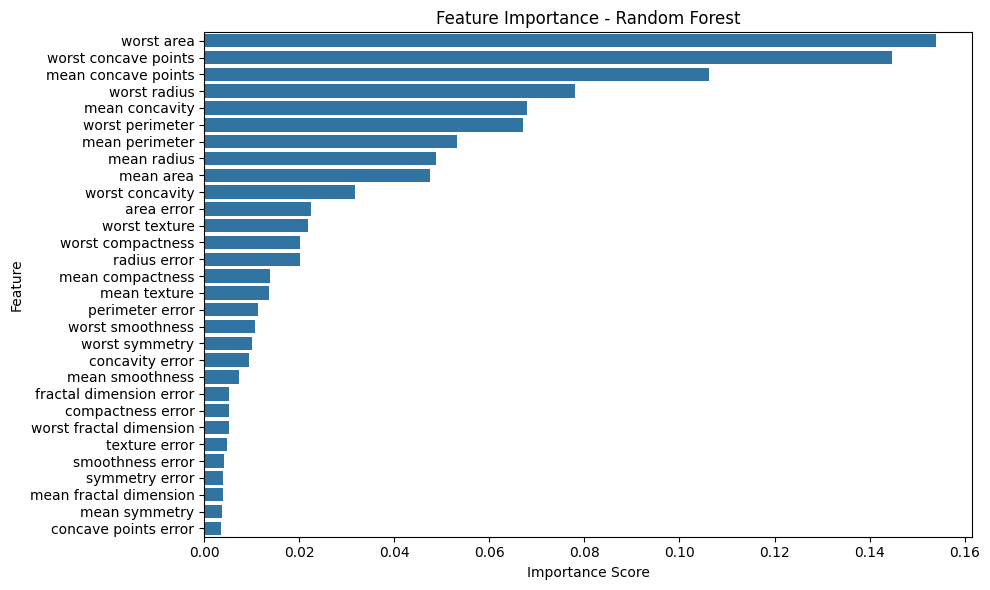

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 获取特征重要性
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 可视化
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# 🧮 方法二：SHAP（SHapley Additive Explanations）

---

## 📌 什么是 SHAP？

**SHAP（SHapley Additive Explanations）** 是一种通用的模型解释方法，基于博弈论中的 **Shapley value** 理论，  
用于计算每个特征在某个预测结果中“应得的功劳”。

它是一种 **局部 + 全局皆可** 的解释方法，被广泛认为是**当前主流模型解释的黄金标准**。

---

## 🎯 为什么选择 SHAP？

| 优点                     | 说明                                                    |
|--------------------------|---------------------------------------------------------|
| ✅ 统一性                 | 可用于任意模型（线性、树模型、深度模型、SVM等）         |
| ✅ 局部解释               | 每个样本都有一组特征贡献值，解释“为什么这么预测”         |
| ✅ 全局解释               | 聚合局部解释后，可以得到全局特征重要性                     |
| ✅ 公平性（Shapley 原则） | 基于数学博弈论，特征的重要性计算具备公平性和一致性         |

---

## 🧠 背后原理：Shapley Value（博弈论）

想象模型预测是一个团队完成的任务：

- 每个特征都是“队员”，模型输出是“总奖金”
- SHAP 就是计算每个特征单独 + 和其他特征一起时，能贡献多少奖金
- 通过穷举所有特征组合的边际贡献，最终得出一个“公平分配”

---

## 🔧 SHAP 安装与基本用法（以树模型为例）

```bash
pip install shap
```


<Figure size 640x480 with 0 Axes>

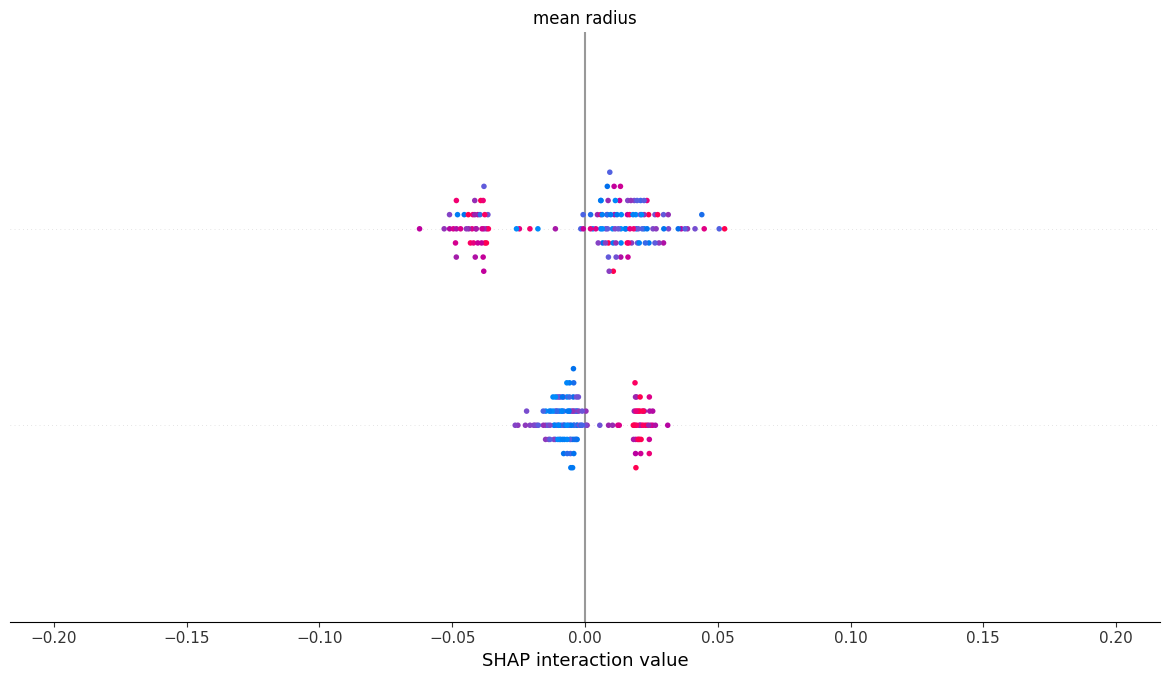

In [16]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 数据加载
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 模型训练
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 使用新版统一接口
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values.values, X_test, feature_names=X_test.columns)

# Force Plot (解释第 0 个测试样本)
shap.plots.force(
    explainer.expected_value[0],
    shap_values.values[..., 0],
    X_test,
    feature_names=X_test.columns
)


# 🔍 方法三：LIME（Local Interpretable Model-agnostic Explanations）

---

## 📌 什么是 LIME？

**LIME（Local Interpretable Model-agnostic Explanations）** 是一种模型不可知（agnostic）的局部解释方法，  
它的目标是解释「**某一个具体样本** 的预测结果是如何得到的」。

---

## 🎯 原理概述

LIME 的基本思路：

1. 选定一个要解释的样本（例如用户 A）
2. 在该样本附近进行轻微扰动，构造一批“邻居样本”
3. 对这些扰动样本用黑盒模型进行预测，获得“真实输出”
4. 用一个可解释的线性模型在邻域内拟合黑盒模型的行为
5. 得到的线性模型系数即为该样本的“局部特征贡献”

---

## ✅ LIME 的优势

| 优点                             | 说明                                          |
|----------------------------------|-----------------------------------------------|
| ✅ 模型无关                       | 可用于任何模型（SVM、神经网络、集成模型等）     |
| ✅ 局部解释清晰                   | 每次解释都聚焦于“某个样本”的具体行为             |
| ✅ 输出为可读线性模型             | 解释结果易于展示和汇报                           |

---

## ⚠️ LIME 的局限

| 局限                         | 说明                                            |
|------------------------------|-------------------------------------------------|
| ❌ 稳定性差                    | 每次扰动采样有随机性，同一样本多次解释可能结果不同   |
| ❌ 不支持全局可解释性           | 只能逐样本解释，无法总结整体模型行为                |
| ❌ 对高维稀疏输入敏感           | 对文本、图像等高维输入，扰动后可能不再“接近原样本”   |


In [18]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=02d7b5327b671fed407a57c1d49a1e344dafa97812e2a48ec14cb7f286c8bbda
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [20]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd

# 🔇 可选：屏蔽 warning 提高 notebook 可读性
import warnings
warnings.filterwarnings("ignore")

# 定义 LIME 解释器（只需拟合 X_train）
explainer = LimeTabularExplainer(
    training_data=X_train.values,         # 使用纯 numpy 数组
    feature_names=X_train.columns.tolist(),
    class_names=['benign', 'malignant'],
    mode='classification'
)

# 显式定义 predict_fn，保证 DataFrame → Numpy 且列名一致
predict_fn = lambda x: model.predict_proba(pd.DataFrame(x, columns=X_train.columns))

# 解释测试集第 i 个样本
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,       # 注意：传入 numpy array（避免 feature name 警告）
    predict_fn=predict_fn
)

# 展示解释结果（需 Notebook 环境）
exp.show_in_notebook(show_table=True)


# 🧩 可解释性总结与实战应用建议

---

## ✅ 三大主流方法对比总览

| 方法         | 适用范围       | 局部解释 | 全局解释 | 是否模型无关 | 稳定性 | 适合应用场景                             |
|--------------|----------------|-----------|-----------|----------------|--------|------------------------------------------|
| Feature Importance | 树模型          | ❌         | ✅         | ❌              | ✅     | 快速看哪个特征重要，用于业务汇报与特征删减       |
| SHAP         | 所有模型        | ✅         | ✅         | ✅              | ✅     | 推荐默认首选，支持审计级别解释                   |
| LIME         | 所有模型        | ✅         | ❌         | ✅              | ❌     | 局部调试、轻量测试、不可解释模型快速定位异常行为  |

---

## 🎯 项目实战中如何落地解释性？

1. **调试阶段（模型开发）**
   - 使用 LIME 查看“错误预测”的局部解释
   - 快速判断模型是否过度依赖某些特征或异常字段

2. **上线前（可视化汇报 / 风控审核）**
   - 使用 SHAP summary plot 展示全局重要性
   - Force plot 展示单个样本决策过程，提供给业务 / 风控复查

3. **部署后（合规审计 / 模型透明性）**
   - 保留 SHAP/LIME 接口，用于 explain-on-demand
   - 记录 SHAP 值日志，监控模型行为随时间的变化

---

## 💬 面试场景高频问法 + 回答建议

### ❓ Q: “你如何解释你的模型？”

✅ 推荐回答结构：

> 我会根据模型类型和使用场景选择解释工具：
> - 如果是树模型如 XGBoost，我首先使用 `feature_importances_` 查看全局重要特征；
> - 对于局部预测（比如风控审批中的某个用户），我会使用 SHAP 或 LIME 来解释具体判定；
> - SHAP 是我的首选方法，因为它既支持全局分析也支持逐个样本解释，同时对模型无依赖；
> - 在上线前，我还会输出 summary_plot + force_plot，供业务和法务做结果可审计备份。

---

### ❓ Q: “为什么选择 SHAP 而不是 LIME？”

✅ 推荐回答：

> 我更倾向于使用 SHAP，因为它具有数学一致性和公平性，同时解释更稳定。LIME 虽然轻量、适合快速分析，但每次扰动采样都可能带来不稳定结果，不适合生产环境。我在调试时会先用 LIME，然后上线用 SHAP 做最终解释。